In [10]:
import numpy as np
import batman
import matplotlib.pyplot as plt
import lightkurve as lk
from astropy.timeseries import LombScargle
import pandas as pd
import glob
import lightkurve as lk

def amplitude_spectrum(t, y, fmin=None, fmax=None, oversample_factor=10.0):
    
    tmax = t.max()
    tmin = t.min()
    df = 1.0 / (tmax - tmin)

    if fmin is None:
        fmin = df
    if fmax is None:
        fmax = 0.5 / np.median(np.diff(t))  # *nyq_mult

    freq = np.arange(fmin, fmax, df / oversample_factor)
    model = LombScargle(t, y)
    sc = model.power(freq, method="fast", normalization="psd")

    fct = np.sqrt(4.0 / len(t))
    amp = np.sqrt(sc) * fct

    return freq, amp

In [2]:
koi = pd.read_csv('../pulsation timing/data/koi_dsct.csv')

In [3]:
KIC = 5202905
koi[koi.kepid == KIC][['koi_period', 'koi_time0bk', 'koi_duration', 'koi_ror', 'koi_prad']]

,koi_period,koi_time0bk,koi_duration,koi_ror,koi_prad
3,22.824514,144.46843,6.617,0.016692,3.36
4,14.844484,143.57600,6.091,0.012341,2.49


In [21]:
file = glob.glob('../prewhitening/results/spline and BIC/prewhitened/*5202905*')[0]
# file = glob.glob('prewhitening/results/BIC/*')[150]


time, flux, flux_err = np.loadtxt(file).T
time = np.ascontiguousarray(time)

flux /= 1e3

/home/daniel/anaconda3/lib/python3.8/site-packages/lightkurve/lightcurve.py:205: LightkurveDeprecationWarning: passing flux as a positional argument is deprecated, please use ``flux=...`` instead.
  warnings.warn(
/home/daniel/anaconda3/lib/python3.8/site-packages/astropy/utils/decorators.py:535: LightkurveDeprecationWarning: "t0" was deprecated in version 2.0 and will be removed in a future version. Use argument "epoch_time" instead.
  return function(*args, **kwargs)


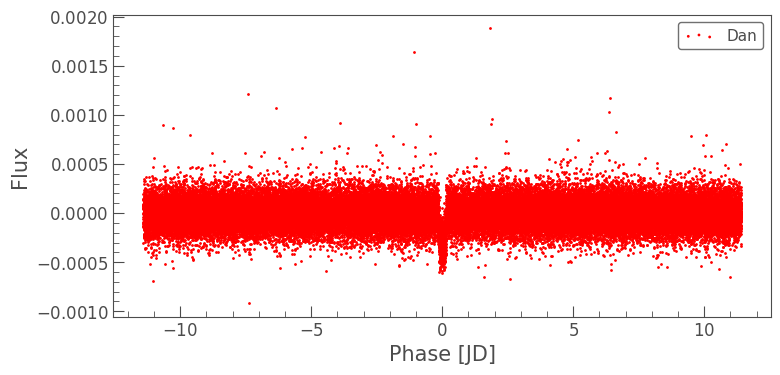

In [22]:
# plt.plot(time, flux)

lc = lk.LightCurve(time, flux)
ax = lc.fold(22.824514, t0=144.46843).scatter(c='red', label='Dan')

In [36]:
import astropy.units as u
((0.31*u.R_jup).to(u.R_sun)) / 1.9

<Quantity 0.01676654 solRad>

In [37]:
(0.1*u.R_jup).to(u.R_earth)

<Quantity 1.12089807 earthRad>

In [27]:
import batman
import numpy as np

params = batman.TransitParams()       #object to store transit parameters
params.t0 = 144.46843                      #time of inferior conjunction
params.per = 22.824514                       #orbital period
params.rp = 0.016692                       #planet radius (in units of stellar radii)
params.a = 30.                        #semi-major axis (in units of stellar radii)
params.inc = 90.                      #orbital inclination (in degrees)
params.ecc = 0.                       #eccentricity
params.w = 90.                        #longitude of periastron (in degrees)
params.limb_dark = "nonlinear"        #limb darkening model
params.u = [0.5, 0.1, 0.1, -0.1]      #limb darkening coefficients [u1, u2, u3, u4]

# t = np.linspace(-0.025, 0.025, 1000)  #times at which to calculate light curve
m = batman.TransitModel(params, time)    #initializes model
model = m.light_curve(params) - 1.

/home/daniel/anaconda3/lib/python3.8/site-packages/lightkurve/lightcurve.py:205: LightkurveDeprecationWarning: passing flux as a positional argument is deprecated, please use ``flux=...`` instead.
  warnings.warn(
/home/daniel/anaconda3/lib/python3.8/site-packages/astropy/utils/decorators.py:535: LightkurveDeprecationWarning: "t0" was deprecated in version 2.0 and will be removed in a future version. Use argument "epoch_time" instead.
  return function(*args, **kwargs)
/home/daniel/anaconda3/lib/python3.8/site-packages/astropy/utils/decorators.py:535: LightkurveDeprecationWarning: "t0" was deprecated in version 2.0 and will be removed in a future version. Use argument "epoch_time" instead.
  return function(*args, **kwargs)


(-0.5, 0.5)

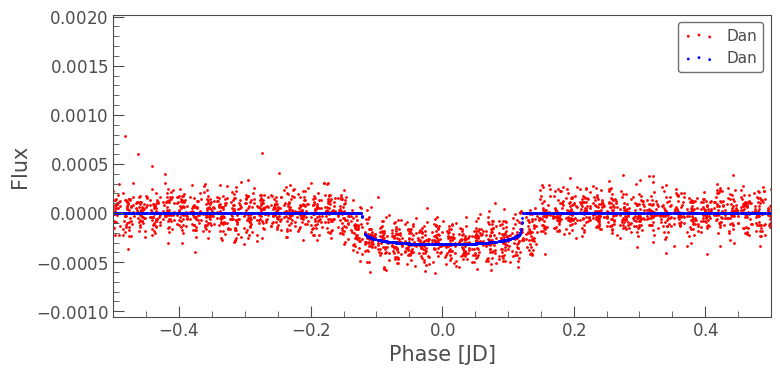

In [33]:
lc_m = lk.LightCurve(time, model)
ax = lc.fold(22.824514, t0=144.46843).scatter(c='red', label='Dan')
lc_m.fold(22.824514, t0=144.46843).scatter(ax=ax,c='blue', label='Dan')

ax.set_xlim(-0.5, 0.5)